# IMPORT LIBRARY

In [75]:
import re
import csv
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, string, os, pickle
import subprocess
import bs4 as bs
import urllib.request
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


df = pd.DataFrame
pd.set_option('max_colwidth',180)

In [76]:
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# LOAD FILE

In [78]:
data = pd.read_excel('~/desktop/KULIAH/SKRIPSI ERICA YEY/data_ibukota.xlsx')

In [79]:
data = data.dropna(axis=0, how='all')

In [80]:
data.drop(["fullname","user_id","tweet_id","tweet_url","timestamp_epochs","replies","retweets","likes","is_retweet","retweeter_username","retweeter_userid","retweet_id","html"],inplace=True, axis=1)

In [81]:
data.shape

(1050, 4)

In [82]:
data.iloc[0].text

'wah..pemindahan ibu kota bisa batal nih.yg daftar udah banyak lhooo....cyyynnnn https://twitter.com/CNNIndonesia/status/1161061126332747776Â\xa0â€¦'

In [83]:
data.iloc[1049].text

'Pokoknya ibukota RI harus pindah ke Kalimantan. Dulu Soeharto mau memindahkan ibukota RI ke Jonggol, Bogor.'

In [84]:
tweet = pd.DataFrame(data.text)
tweet

,text
0,wah..pemindahan ibu kota bisa batal nih.yg daftar udah banyak lhooo....cyyynnnn https://twitter.com/CNNIndonesia/status/1161061126332747776Â â€¦
1,Makin terang benderang pindahna ibu kota krn pemimpin daerah Guud bener dejakertah kebijakanna ga sesuai maunya dalang... https://twitter.com/VIVAcoid/status/116088087224708710...
2,"ga perlu ribuan pasukan ngelumpuhin ibukota baru cukup 1 orang cari lahan gambut yg pas bakar, lumpuh dah kena serangan asap... Kalimantan emang aman dr gempa bumi tp tidak ama..."
3,wah..pemindahan ibu kota bisa batal nih.yg daftar udah banyak lhooo....cyyynnnn https://twitter.com/CNNIndonesia/status/1161061126332747776Â â€¦
4,Makin terang benderang pindahna ibu kota krn pemimpin daerah Guud bener dejakertah kebijakanna ga sesuai maunya dalang... https://twitter.com/VIVAcoid/status/116088087224708710...
...,...
1045,Alhamdulilah.. Ganti ibu kota. Setuju
1046,"Jangan kawatir ibu kota negara yg baru tidak akan seperti Jakarta. Ibu kota negara hanya utk urusan pemerintahan dan dan diplomatik. Ngak akan merusak lingkungan kok, contoh sa..."
1047,"Saya setuju, pindahkan aja biar jakarta sepi, kalo perlu ibukota pindah ke eropa biar bisa jalan2.. \r\n\r\nEnjoy aja https://twitter.com/geloraco/status/1166227926410358785Â â€¦"
1048,"mk itu sy setuju, ibukota pindah"


# CLEANING

In [85]:
def clean_text(text):
    text = text.lower()
    # menghilangkan Nama Akun
    text = re.sub('@[^\s]+', ' ', text)
    # menghilangkan Hastag
    text = re.sub('#[^\s]+', ' ', text)
    # menghilangkan angka
    text = re.sub('\w*\d\w*',' ',text)
    # menghilangkan URL
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', text)
    #menghilangkan vid
    text = re.sub('\[vid]', " ",text)
    #menghilangkan vid
    text = re.sub('\[vid]', " ",text)
    # menghilangkan Huruf Tunggal
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)
    #menghilangkan huruf berulang
    text = re.sub(r'([a-z])\1+', r'\1', text)
    #menghilangkan new line
    text = re.sub(' +', " ", text)
    # menghilangkan tanda baca
    text = re.sub('\[.*?\]',' ',text)
    # menghilangkan punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation),' ',text)
    #menghilangkan â€¦
    text = re.sub('â€¦', '', text)
    #menghilangkan \r
    text = re.sub("\r", " ", text)
    #menghilangkan \n
    text = re.sub("\n", " ", text)
    #menghilangkan â©
    text = re.sub('â©', '', text)
    #Remove additional white spaces
    text = re.sub('[\s]+', " ", text)
    return text

clean = lambda x: clean_text(x)

In [86]:
tweet = pd.DataFrame(tweet.text.apply(clean))
tweet.head(20)

,text
0,wah pemindahan ibu kota bisa batal nih yg daftar udah banyak lho cyn
1,makin terang benderang pindahna ibu kota krn pemimpin daerah gud bener dejakertah kebijakana ga sesuai maunya dalang
2,ga perlu ribuan pasukan ngelumpuhin ibukota baru cukup orang cari lahan gambut yg pas bakar lumpuh dah kena serangan asap kalimantan emang aman dr gempa bumi tp tidak aman dr b...
3,wah pemindahan ibu kota bisa batal nih yg daftar udah banyak lho cyn
4,makin terang benderang pindahna ibu kota krn pemimpin daerah gud bener dejakertah kebijakana ga sesuai maunya dalang
5,ga perlu ribuan pasukan ngelumpuhin ibukota baru cukup orang cari lahan gambut yg pas bakar lumpuh dah kena serangan asap kalimantan emang aman dr gempa bumi tp tidak aman dr b...
6,ktika kamu mengira rezim tidak mungkin bsa lbh gila lebih kurang ajar lg they surprise you setelah dg konyol berwacana pindah ibukota sat apbn defisit ekonomi tersendat phk mas...
7,mending bayar hutang diselesaikan dulu daripada mindah ibukota utang saja masih mengunung apa ngak pakai biaya
8,ibu kota dan pengusaha pindah takut tsunami tengelamkan jakarta
9,bapenas jangan bohong menurut pemimpin kita ekonomi meroket mau pindah ibu kota loh


# SLANG (ABREVIASI)

In [93]:
#slang: tdk -> tidak. jgn -> jangan

import csv
import re

def translator(user_string):
    user_string = user_string.split(" ")
    j = 0
    for _str in user_string:
        # File path which consists of Abbreviations.
        fileName = "colloquial-indonesian-lexicon.csv"
        # File Access mode [Read Mode]
        accessMode = "r"
        with open(fileName, accessMode) as myCSVfile:
            # Reading file as CSV with delimiter as "=", so that abbreviation are stored in row[0] and phrases in row[1]
            dataFromFile = csv.reader(myCSVfile, delimiter=",")
            # Removing Special Characters.
            str = re.sub('[^a-zA-Z0-9-.]', '', _str)
            for row in dataFromFile:
                # Check if selected word matches short forms[LHS] in text file.
                if _str.lower() == row[0]:
                    # If match found replace it with its appropriate phrase in text file.
                    user_string[j] = row[1]
            myCSVfile.close()
        j = j + 1
    # Replacing commas with spaces for final output.
    a = (' '.join(user_string))
    print(a)
    return a

abreviasi = lambda x: translator(x)

In [94]:
tweet = pd.DataFrame(tweet.text.apply(abreviasi))
tweet.head(20)

wah pemindahan ibu kota bisa batal nih yang daftar sudah banyak lho cyn 
makin terang benderang pindahna ibu kota karena pemimpin daerah gud benar dejakertah kebijakana enggak sesuai maunya dalang 
enggak perlu ribuan pasukan ngelumpuhin ibukota baru cukup orang cari lahan gambut yang pas bakar lumpuh deh kena serangan asap kalimantan memang aman dari gempa bumi tapi tidak aman dari banjir dan kebakaran hutan
wah pemindahan ibu kota bisa batal nih yang daftar sudah banyak lho cyn 
makin terang benderang pindahna ibu kota karena pemimpin daerah gud benar dejakertah kebijakana enggak sesuai maunya dalang 
enggak perlu ribuan pasukan ngelumpuhin ibukota baru cukup orang cari lahan gambut yang pas bakar lumpuh deh kena serangan asap kalimantan memang aman dari gempa bumi tapi tidak aman dari banjir dan kebakaran hutan
ketika kamu mengira rezim tidak mungkin bisa lebih gila lebih kurang ajar lagi they surprise you setelah dengan konyol berwacana pindah ibukota sat apbn defisit ekonomi terse

,text
0,wah pemindahan ibu kota bisa batal nih yang daftar sudah banyak lho cyn
1,makin terang benderang pindahna ibu kota karena pemimpin daerah gud benar dejakertah kebijakana enggak sesuai maunya dalang
2,enggak perlu ribuan pasukan ngelumpuhin ibukota baru cukup orang cari lahan gambut yang pas bakar lumpuh deh kena serangan asap kalimantan memang aman dari gempa bumi tapi tida...
3,wah pemindahan ibu kota bisa batal nih yang daftar sudah banyak lho cyn
4,makin terang benderang pindahna ibu kota karena pemimpin daerah gud benar dejakertah kebijakana enggak sesuai maunya dalang
5,enggak perlu ribuan pasukan ngelumpuhin ibukota baru cukup orang cari lahan gambut yang pas bakar lumpuh deh kena serangan asap kalimantan memang aman dari gempa bumi tapi tida...
6,ketika kamu mengira rezim tidak mungkin bisa lebih gila lebih kurang ajar lagi they surprise you setelah dengan konyol berwacana pindah ibukota sat apbn defisit ekonomi tersend...
7,mending bayar hutang diselesaikan dulu daripada mindah ibukota utang saja masih mengunung apa enggak pakai biaya
8,ibu kota dan pengusaha pindah takut tsunami tengelamkan jakarta
9,bapenas jangan bohong menurut pemimpin kita ekonomi meroket mau pindah ibu kota loh


In [57]:
#tweet=str
#type(tweet)

In [58]:
translator("jgn")

jangan


'jangan'

In [17]:
len(tweet)

1050

# TOKENISASI + STOPWORD REMOVAL

In [159]:
def get_stopword(stopwordsfile):
    stopwords=[]
    file_stopwords = open(stopwordsfile,'r')
    row = file_stopwords.readline()
    while row:
        word = row.strip()
        stopwords.append(word)
        row = file_stopwords.readline()
    file_stopwords.close()
    return stopwords

In [160]:
stop_words_indo = get_stopword('stopwordlist.txt')

In [161]:
def stopwords(text):

    tokens = word_tokenize(text)
    filtered = []
    
    for w in tokens:
        if w not in stop_words_indo:
            filtered.append(w)
        
    hasil = ' '.join(filtered)
    return hasil

st = lambda x: stopwords(x)

In [162]:
tweet = pd.DataFrame(tweet.text.apply(st))
tweet

,text
0,batal daftar
1,terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai dalang
2,ribu pasu ngelumpuhin baru orang cari lahan gambut pas bakar lumpuh deh kena serang asap aman gempa bumi aman banjir bakar hutan
3,batal daftar
4,terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai dalang
...,...
1045,alhamdulilah ganti
1046,kawatir negara baru jakarta negara urus perintah diplomatik rusak lingkung contoh canbera welington washington
1047,biar jakarta sepi kalo eropa biar enjoy
1048,


# STEMMING (KATA DASAR)

In [99]:
def stemming(text):

    factory_stem = StemmerFactory()
    stemmer = factory_stem.create_stemmer()
    text = stemmer.stem(text)
    return text

stem = lambda x: stemming(x)

In [100]:
tweet = pd.DataFrame(tweet.text.apply(stem))
tweet

,text
0,pindah batal nih daftar
1,terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang
2,ribu pasu ngelumpuhin baru orang cari lahan gambut pas bakar lumpuh deh kena serang asap kalimantan aman gempa bumi aman banjir bakar hutan
3,pindah batal nih daftar
4,terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang
...,...
1045,alhamdulilah ganti tuju
1046,kawatir negara baru jakarta negara urus perintah diplomatik rusak lingkung contoh canbera welington washington
1047,tuju pindah biar jakarta sepi kalo pindah eropa biar enjoy
1048,tuju pindah


# TF-IDF-CF

In [65]:
#tweet = pd.read_csv('~/desktop/KULIAH/SKRIPSI ERICA YEY/dataku/stemming.csv')

In [66]:
tweet['sentimen'] = data.sentimen

In [67]:
y = tweet.sentimen
x = tweet.text
print(x.shape)
print(y.shape)

(10,)
(10,)


In [68]:
tweet

,text,sentimen
0,pindah batal nih daftar,-1
1,warga asli pontianak tuju pontianak negara budaya bahasa adat istiadat tergangu alhamdulilah pontianak kandidat cocok ri,-1
2,mindahin dampak pusat ekonomi jakarta atuh kalo dampak mindahin kalo mau bangun infrastruktur cukong kalimantan pakai alesan pindahin jujur nethink,-1
3,sulit sedih anyway you got the point pindah bilang indonesia mending fokus baik bijak ekonomi tingkat tumbuh ekonomi stagnan wel mau fokus sdm,-1
4,baru adan efektif jalan roda perintah pikir matang putus pindah,0
5,bangun baru butuh biaya hinga triliun rupiah skema dan siap lantas skema dan tutup butuh dana bangun baru tonton bahasa duarah pkl wibpic twiter com sfpr un ribu,0
6,lo point kalo njenengan percaya alah yasudah pasrah tau pindah rencana alah lo tau,0
7,pindah duduk jakarta kurang pindah baru sehinga padat duduk penganguran atas tingkat kriminalisasi tekan kumparangiveaway membayangkanjakarta,1
8,gue orang kalimat mikirnya tuh st kalimantan luas ngarti luas sempit jakarta hutan kalimantan pindah hutan pelosok,1
9,pindah ekonomi rata kalimantan kurang orang,1


In [69]:
def get_stopword(stopwordsfile):
    stopwords=[]
    file_stopwords = open(stopwordsfile,'r')
    row = file_stopwords.readline()
    while row:
        word = row.strip()
        stopwords.append(word)
        row = file_stopwords.readline()
    file_stopwords.close()
    return stopwords

stop_words_indo = get_stopword('stopwordlist.txt')

In [70]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stop_words_indo)
#max_features=1500, min_df=5

In [74]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['ada', 'adalah', 'adanya', 'adapun', 'agak',
                            'agaknya', 'agar', 'akan', 'akankah', 'akhir',
                            'akhiri', 'akhirnya', 'aku', 'akulah', 'amat',
                            'amatlah', 'anda', 'andalah', 'antar', 'antara',
                            'antaranya', 'apa', 'apaan', 'apabila', 'apakah',
                            'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', ...],
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

# NAIVE BAYES

In [30]:
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stop_words_indo)

In [75]:
#pembagian data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [76]:
print('Text Size     : ', x.shape)
print('Sentimen Size : ', y.shape)
print('Test Size     : ', X_test.shape, y_test.shape)
print('Train Size    : ', X_train.shape, y_train.shape)

Text Size     :  (1050,)
Sentimen Size :  (1050,)
Test Size     :  (210,) (210,)
Train Size    :  (840,) (840,)


In [77]:
len(tweet.text)

1050

# Multinomial NB

In [199]:
#pembagian data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [200]:
mnb = MultinomialNB()
y_train = y_train.astype('int')
Xv = vectorizer.fit_transform(X_train)

mnb.fit(Xv, y_train)
x_testdf = vectorizer.transform(X_test)

pred = mnb.predict(x_testdf)
actual = np.array(y_test)

accuracy_score(actual, pred)

0.7047619047619048

In [201]:
results = confusion_matrix(actual, pred)
print('Confusion Matrix:')
print(results)
print('Accurscy Score:', accuracy_score(actual,pred))
print('Report:')
print(classification_report(actual, pred))

Confusion Matrix:
[[27  4  3]
 [ 5 19  8]
 [ 6  5 28]]
Accurscy Score: 0.7047619047619048
Report:
              precision    recall  f1-score   support

          -1       0.71      0.79      0.75        34
           0       0.68      0.59      0.63        32
           1       0.72      0.72      0.72        39

    accuracy                           0.70       105
   macro avg       0.70      0.70      0.70       105
weighted avg       0.70      0.70      0.70       105



# Bernoulli NB

In [235]:
#pembagian data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [236]:

Xv = vectorizer.fit_transform(X_train)
y_train = y_train.astype('int')

bnb = BernoulliNB(binarize = True)
bnb.fit(Xv, y_train)
x_testdf = vectorizer.transform(X_test)

pred2 = bnb.predict(x_testdf)
actual = np.array(y_test)

accuracy_score(actual, pred2)

0.3238095238095238

In [237]:
results = confusion_matrix(actual, pred2)
print('Confusion Matrix:')
print(results)
print('Accurscy Score:', accuracy_score(actual,pred2))
print('Report:')
print(classification_report(actual, pred2))

Confusion Matrix:
[[ 0  0 35]
 [ 0  0 36]
 [ 0  0 34]]
Accurscy Score: 0.3238095238095238
Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        35
           0       0.00      0.00      0.00        36
           1       0.32      1.00      0.49        34

    accuracy                           0.32       105
   macro avg       0.11      0.33      0.16       105
weighted avg       0.10      0.32      0.16       105



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gaussian NB

In [254]:
#pembagian data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [255]:
gnb = GaussianNB()
y_train = y_train.astype('int')

x_traindf = vectorizer.transform(X_train.astype('U')).toarray()
x_testdf = vectorizer.transform(X_test.astype('U')).toarray()
gnb.fit(x_traindf, y_train)

pred3 = gnb.predict(x_testdf)
actual = np.array(y_test)

accuracy_score(actual, pred3)

0.5523809523809524

In [256]:
results = confusion_matrix(actual, pred3)
print('Confusion Matrix:')
print(results)
print('Accurscy Score:', accuracy_score(actual,pred3))
print('Report:')
print(classification_report(actual, pred3))

Confusion Matrix:
[[22  5 14]
 [ 3 12 14]
 [ 2  9 24]]
Accurscy Score: 0.5523809523809524
Report:
              precision    recall  f1-score   support

          -1       0.81      0.54      0.65        41
           0       0.46      0.41      0.44        29
           1       0.46      0.69      0.55        35

    accuracy                           0.55       105
   macro avg       0.58      0.55      0.55       105
weighted avg       0.60      0.55      0.56       105



# WORDCLOUD

In [207]:
from nltk.tokenize import sent_tokenize, word_tokenize
token_tweet = tweet['text'].apply(word_tokenize)

In [208]:
print(token_tweet)

0                                                                                                                                              [pindah, batal, nih, daftar]
1                                                                           [terang, benderang, pindahna, pimpin, daerah, gud, dejakertah, kebijakana, sesuai, mau, dalang]
2       [ribu, pasu, ngelumpuhin, baru, orang, cari, lahan, gambut, pas, bakar, lumpuh, deh, kena, serang, asap, kalimantan, aman, gempa, bumi, aman, banjir, bakar, hutan]
3                                                                                                                                              [pindah, batal, nih, daftar]
4                                                                           [terang, benderang, pindahna, pimpin, daerah, gud, dejakertah, kebijakana, sesuai, mau, dalang]
                                                                                       ...                                                  

In [215]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenize = []
for i in token_tweet : 
        hasil = TreebankWordDetokenizer().detokenize(i)
        detokenize.append(hasil) 
detokenize

['pindah batal nih daftar',
 'terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang',
 'ribu pasu ngelumpuhin baru orang cari lahan gambut pas bakar lumpuh deh kena serang asap kalimantan aman gempa bumi aman banjir bakar hutan',
 'pindah batal nih daftar',
 'terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang',
 'ribu pasu ngelumpuhin baru orang cari lahan gambut pas bakar lumpuh deh kena serang asap kalimantan aman gempa bumi aman banjir bakar hutan',
 'rezim gila ajar they surprise you konyol wacana pindah sat apbn defisit ekonomi sendat phk masal bpjs sekarat',
 'mending bayar hutang selesai mindah utang mengunung pakai biaya',
 'usaha pindah takut tsunami tengelamkan jakarta',
 'bapenas bohong pimpin ekonomi roket mau pindah loh',
 'benar mau pindah palangkaraya palangkaraya sampit pekanbaru sat papar asap karhutla terbang selamat pagi kabut asap kepung palangka raya sekolah libur utm source twiter utm medium oa utm con

In [219]:
tweet.text = detokenize
print(tweet.text)

0                                                                                                                           pindah batal nih daftar
1                                                               terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang
2       ribu pasu ngelumpuhin baru orang cari lahan gambut pas bakar lumpuh deh kena serang asap kalimantan aman gempa bumi aman banjir bakar hutan
3                                                                                                                           pindah batal nih daftar
4                                                               terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang
                                                                           ...                                                                     
1045                                                                                                            

In [221]:
tweet = pd.DataFrame(tweet)
tweet

,text,sentimen
0,pindah batal nih daftar,-1
1,terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang,-1
2,ribu pasu ngelumpuhin baru orang cari lahan gambut pas bakar lumpuh deh kena serang asap kalimantan aman gempa bumi aman banjir bakar hutan,-1
3,pindah batal nih daftar,-1
4,terang benderang pindahna pimpin daerah gud dejakertah kebijakana sesuai mau dalang,-1
...,...,...
1045,alhamdulilah ganti tuju,1
1046,kawatir negara baru jakarta negara urus perintah diplomatik rusak lingkung contoh canbera welington washington,1
1047,tuju pindah biar jakarta sepi kalo pindah eropa biar enjoy,1
1048,tuju pindah,1


In [222]:
from nltk.tag import CRFTagger
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
tagged_tweet = ct.tag_sents(tweet.text)

print(tagged_tweet)

NameError: name 'pycrfsuite' is not defined

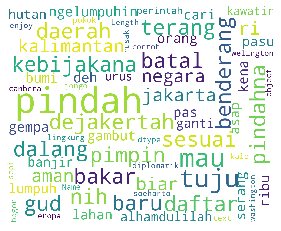

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

text = str(tweet.text)
our_mask = np.array(Image.open('twitter.png'))

cloud = WordCloud(background_color="white", mask = our_mask).generate(text)

plt.imshow(cloud)
plt.axis('off')
plt.show()

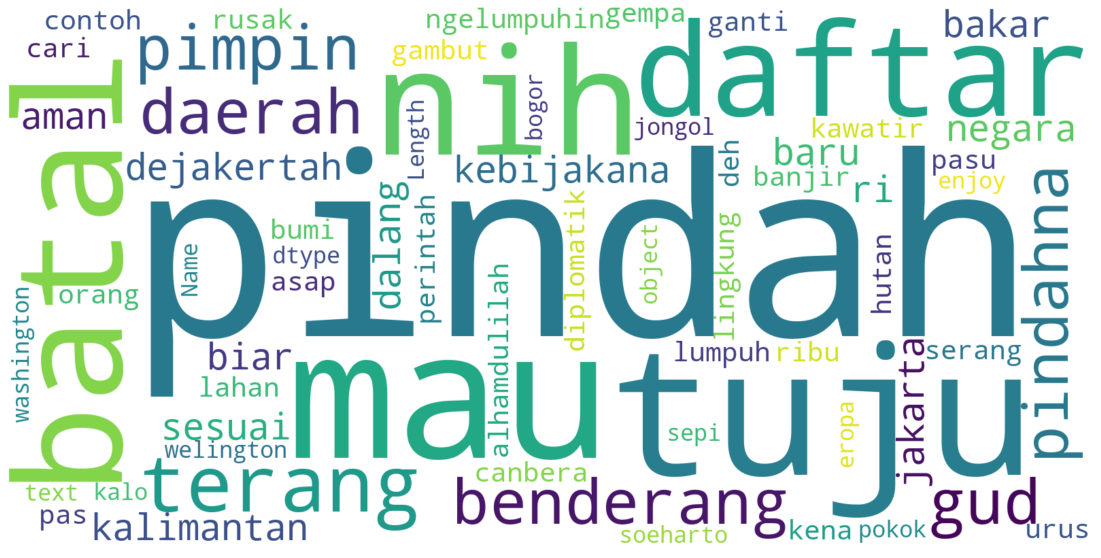

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#y=[data.sentimen == 1]
text = str(tweet.text)

#our_mask = np.array(Image.open('twitter.png'))

cloud = WordCloud(background_color="white", mode="RGB", max_words=150, width=1600, height=800).generate(text)
#max_font_size=25
plt.figure(figsize=[20,10])
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [38]:
import re
import string
frequency = {}
document_text = str(tweet.text)
text_string = document_text
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count                = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print(words, frequency[words])
    


pindah 7
batal 2
nih 2
daftar 2
terang 2
benderang 2
pindahna 2
pimpin 2
daerah 2
gud 2
dejakertah 2
kebijakana 2
sesuai 2
mau 3
dalang 2
ribu 1
pasu 1
ngelumpuhin 1
baru 2
orang 1
cari 1
lahan 1
gambut 1
pas 1
bakar 2
lumpuh 1
deh 1
kena 1
serang 1
asap 1
kalimantan 2
aman 2
gempa 1
bumi 1
banjir 1
hutan 1
alhamdulilah 1
ganti 1
tuju 3
kawatir 1
negara 2
jakarta 2
urus 1
perintah 1
diplomatik 1
rusak 1
lingkung 1
contoh 1
canbera 1
welington 1
washington 1
biar 2
sepi 1
kalo 1
eropa 1
enjoy 1
pokok 1
soeharto 1
jongol 1
bogor 1
text 1
dtype 1
object 1


In [42]:
from collections import Counter
Counter  = Counter(words)
most_words = Counter.most_common(5)

print(most_words)

[('o', 1), ('b', 1), ('j', 1), ('e', 1), ('c', 1)]


In [163]:
datapos = tweet.loc[data['sentimen'] == 1]
datapos
dataneg = tweet.loc[data['sentimen'] == -1]
dataneg
datanet = tweet.loc[data['sentimen'] == 0]
datanet

,text
350,komnas ham memangil gubernur dki jakarta anies baswedan swastanisasi air kawasan ri ketua komnas ham ahmad taufan id
351,salah benak barang konstribusi macet mengunakan transportasi pribadi parah macet pandji kerap zona nyamanya
352,chanel youtube tg bisnis bidang jual beli rental mobil tambang video tg rencana perintah pusat negara infrastruktur bangun gema bang
353,salah benak barang konstribusi macet mengunakan transportasi pribadi parah macet pandji kerap zona nyamanya
354,chanel youtube tg bisnis bidang jual beli rental mobil tambang video tg rencana perintah pusat negara infrastruktur bangun gema bang
...,...
695,kemarin beliau izin rakyat rakyat izin rakyat pengaruh demokrasi laku sekian
696,pandandangan hutan kikis marak nya tambang batubara kila
697,populasi penuh pulau jawa transmigrasi dsk sisi negatif hutan alih fungsi
698,wacana negara jakarta baru zaman presiden ri sukarno wacana cuat presiden indonesia agenda kaji


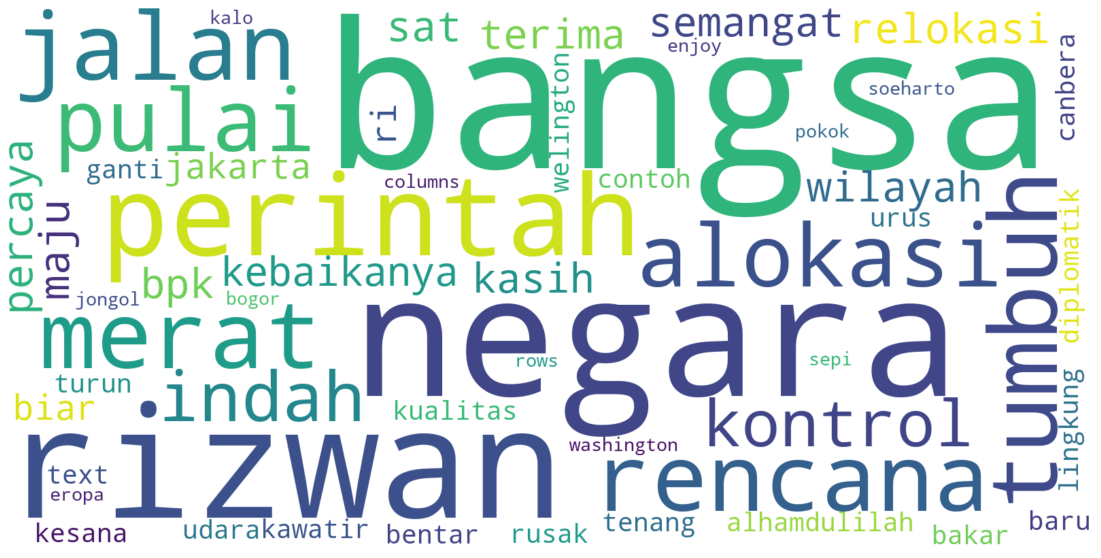

In [169]:
#POSITIF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#y=[data.sentimen == 1]
text = str(datapos)

#our_mask = np.array(Image.open('twitter.png'))

cloud = WordCloud(background_color="white", mode="RGB", max_words=150, width=1600, height=800).generate(text)
#max_font_size=25
plt.figure(figsize=[20,10])
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [165]:
import re
import string
frequency = {}
document_text = str(datapos)
text_string = document_text
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count                = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print(words, frequency[words])
    


text 1
rencana 2
merat 2
tumbuh 2
negara 4
jalan 2
rizwan 4
perintah 3
alokasi 2
pulai 2
indah 2
kontrol 2
wilayah 2
percaya 2
bangsa 6
maju 2
sat 2
relokasi 2
semangat 2
bpk 2
terima 2
kasih 2
kebaikanya 2
tenang 1
bentar 1
kesana 1
bakar 1
turun 1
kualitas 1
udara 1
alhamdulilah 1
ganti 1
kawatir 1
baru 1
jakarta 2
urus 1
diplomatik 1
rusak 1
lingkung 1
contoh 1
canbera 1
welington 1
washington 1
biar 2
sepi 1
kalo 1
eropa 1
enjoy 1
pokok 1
soeharto 1
jongol 1
bogor 1
rows 1
columns 1


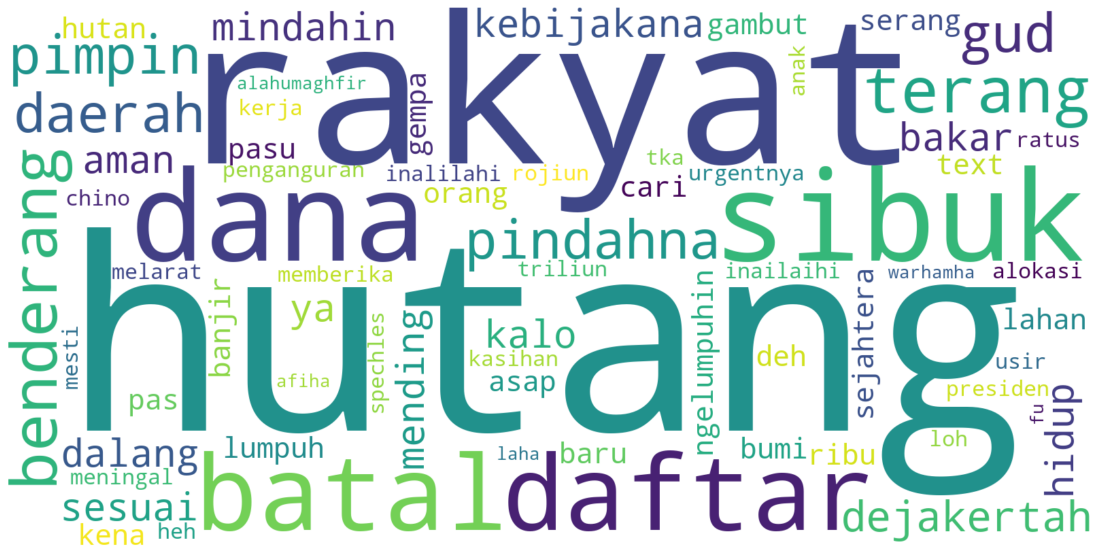

In [166]:
#NEGATIF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#y=[data.sentimen == 1]
text = str(dataneg)

#our_mask = np.array(Image.open('twitter.png'))

cloud = WordCloud(background_color="white", mode="RGB", max_words=70, width=1600, height=800).generate(text)
#max_font_size=25
plt.figure(figsize=[20,10])
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [167]:
import re
import string
frequency = {}
document_text = str(dataneg)
text_string = document_text
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)
 
for word in match_pattern:
    count                = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()
 
for words in frequency_list:
    print(words, frequency[words])
    


text 1
batal 2
daftar 2
terang 2
benderang 2
pindahna 2
pimpin 2
daerah 2
gud 2
dejakertah 2
kebijakana 2
sesuai 2
dalang 2
ribu 1
pasu 1
ngelumpuhin 1
baru 1
orang 1
cari 1
lahan 1
gambut 1
pas 1
bakar 2
lumpuh 1
deh 1
kena 1
serang 1
asap 1
aman 2
gempa 1
bumi 1
banjir 1
hutan 1
rakyat 3
sejahtera 1
penganguran 1
sibuk 3
mindahin 2
memberika 1
kerja 1
mesti 1
usir 1
tka 1
chino 1
loh 1
urgentnya 1
kasihan 1
anak 1
hidup 2
melarat 1
meningal 1
presiden 1
alokasi 1
dana 3
ratus 1
triliun 1
heh 1
spechles 1
inalilahi 1
inailaihi 1
rojiun 1
alahumaghfir 1
laha 1
warhamha 1
afiha 1
anha 1
status 1
oceh 1
rencana 1
negara 1
utang 1
gunung 1
untung 1
rugi 1
hitung 1
studi 1
kelayakanya 1
kalo 2
pakai 1
hutang 5
oke 1
merat 1
ningalin 1
mending 2
upayain 1
maksimalin 1
ngurangin 1
beban 1
penuh 1
buka 1
enak 1
mudah 1
gampang 1
biaya 1
bangun 1
kesejahteran 1
mindakan 1
butuh 1
matang 1
rows 1
columns 1


In [41]:
from sklearn.utils.class_weight import check_sample_weight

ImportError: cannot import name 'check_sample_weight' from 'sklearn.utils.class_weight' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/class_weight.py)

In [ ]:
vectorizer.fit(tweet.text)
vectorizer.transform(tweet.text)

In [ ]:
print(data['text'].dtype)

In [44]:
correction("pemindahan")

'pendahan'

In [260]:
translator("yg")

yang


'yang'

In [ ]:
 data.columns[data.isna().any()].tolist()

In [78]:
tweet.to_csv('~/desktop/KULIAH/SKRIPSI ERICA YEY/stemming.csv', index=False)

In [ ]:
print(data.text.head(20))